In [ ]:
%pip install wordcloud
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#sklearn model and transformer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Iteratively read files
import glob
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/bbc-news-data.csv"
df = pd.read_csv(path, sep='\t')
my_df = pd.DataFrame({'1':[1,2,3], '2':[1,2,3]})

df.describe()

,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,001.txt,Microsoft seeking spyware trojan,Microsoft has warned PC users to update their...
freq,511,5,2,2


In [ ]:
df.append([1,1,1], ignore_index=True)

<ipython-input-10-d01d9242ca12>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append([1,1,1], ignore_index=True)


,category,filename,title,content,0
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,NaN
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,NaN
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,NaN
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,NaN
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,NaN
...,...,...,...,...,...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,NaN
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,...",NaN
2225,NaN,NaN,NaN,NaN,1.0
2226,NaN,NaN,NaN,NaN,1.0


In [ ]:
df.dropna()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
df['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [ ]:
data = pd.DataFrame(df, columns=['category', 'title', 'content'])
data.head(10)

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [ ]:
tags_values = data['category'].value_counts()
tags_values

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
heading_sport = data[data["category"]=="sport"]["title"]
collapsed_heading_sport = heading_sport.str.cat(sep=' ')
heading_business  = data[data["category"]=="business"]["title"]
collapsed_heading_business = heading_sport.str.cat(sep=' ')
heading_politics  = data[data["category"]=="politics"]["title"] 
collapsed_heading_politics = heading_sport.str.cat(sep=' ')
heading_tech  = data[data["category"]=="tech"]["title"] 
collapsed_heading_tech = heading_sport.str.cat(sep=' ')
heading_entertainment  = data[data["category"]=="entertainment"]["title"] 
collapsed_heading_entertainment = heading_sport.str.cat(sep=' ')
heading_entertainment

510     Gallery unveils interactive tree
511    Jarre joins fairytale celebration
512     Musical treatment for Capra film
513    Richard and Judy choose top books
514    Poppins musical gets flying start
                     ...                
891    Last Star Wars 'not for children'
892    French honour for director Parker
893     Robots march to US cinema summit
894     Hobbit picture 'four years away'
895     Buffy creator joins Wonder Woman
Name: title, Length: 386, dtype: object

Word Cloud for sport


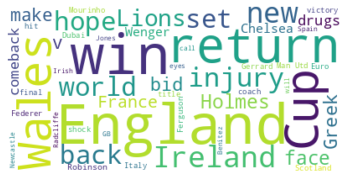

Word Cloud for buisnes


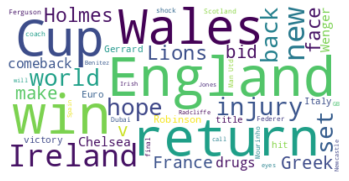

Word Cloud for tech


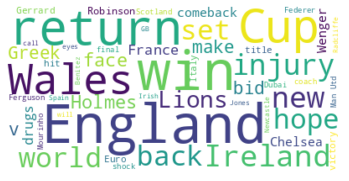

In [ ]:
stopwords = set(STOPWORDS)
print("Word Cloud for sport")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_sport)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

print("Word Cloud for buisnes")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_business)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

print("Word Cloud for tech")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_tech)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['title'], data['category'], test_size = 0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1780,), (445,), (1780,), (445,))

In [ ]:
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
X = vectorizer.fit_transform(X_train, y_train)
transformer.fit(X)
X = transformer.transform(X)
model = MultinomialNB()

model.fit(X, y_train)

MultinomialNB()

In [ ]:
x = vectorizer.transform(X_test)
x = transformer.transform(x)
print(model.score(x,y_test))
predicted = model.predict(x)

0.8247191011235955


In [ ]:
value_true = predicted == y_test
true_counted = value_true.value_counts()
true_counted

True     367
False     78
Name: category, dtype: int64

In [ ]:
vectorizer = CountVectorizer(stop_words="english")
transformer = TfidfTransformer()
X = vectorizer.fit_transform(X_train, y_train)
transformer.fit(X)
X = transformer.transform(X)
model = RandomForestClassifier()

model.fit(X, y_train)

RandomForestClassifier()

In [ ]:
x = vectorizer.transform(X_test)
x = transformer.transform(x)
print(model.score(x,y_test))
predicted = model.predict(x)

0.7280898876404495


In [ ]:
vectorizer = CountVectorizer(stop_words="english")
transformer = TfidfTransformer()
X = vectorizer.fit_transform(X_train, y_train)
transformer.fit(X)
X = transformer.transform(X)
model = LogisticRegression()

model.fit(X, y_train)

LogisticRegression()

In [ ]:
x = vectorizer.transform(X_test)
x = transformer.transform(x)
print(model.score(x,y_test))
predicted = model.predict(x)

0.8382022471910112


In [ ]:
%pip install nltk

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ectorizer = CountVectorizer()
transformer = TfidfTransformer()
X = vectorizer.fit_transform(X_train, y_train)
transformer.fit(X)
X = transformer.transform(X)
model = MultinomialNB()

model.fit(X, y_train)
x = vectorizer.transform(X_test)
x = transformer.transform(x)
print(model.score(x,y_test))
predicted = model.predict(x)

0.8224719101123595


In [ ]:
stop_words = set(stopwords.words('english'))
data['clean_title'] = data['title'].apply(lambda x: ' '.join(t for t in x.split() if t not in stop_words))
data['clean_category'] = data['category'].apply(lambda x: ' '.join(t for t in x.split() if t not in stop_words))

X_train, X_test, y_train, y_test = train_test_split(data['clean_title'], data['clean_category'], test_size = 0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1780,), (445,), (1780,), (445,))

In [ ]:
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
X = vectorizer.fit_transform(X_train, y_train)
transformer.fit(X)
X = transformer.transform(X)
model = MultinomialNB()

model.fit(X, y_train)
x = vectorizer.transform(X_test)
x = transformer.transform(x)
print(model.score(x,y_test))
predicted = model.predict(x)

0.8179775280898877


In [ ]:
data['clean_title']

0       Ad sales boost Time Warner profit
1           Dollar gains Greenspan speech
2       Yukos unit buyer faces loan claim
3       High fuel prices hit BA's profits
4       Pernod takeover talk lifts Domecq
                      ...                
2220        BT program beat dialler scams
2221      Spam e-mails tempt net shoppers
2222                      Be careful code
2223      US cyber security chief resigns
2224                 Losing online gaming
Name: clean_title, Length: 2225, dtype: object

In [ ]:
data['clean_category']

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: clean_category, Length: 2225, dtype: object